
# Rod Pump 4: Minimum Viable Product

Problem Statement

> What production and mechanical parameters are the leading predictors for rod pump failure/downtime? What is best design?

The Challenges


>Distinguishing the type of parameters that cause failure and downtime
*   Which are the most prominent?  
*   Can we successfully group them, and which will be the biggest threat?

>Analyze the data to understand what when failures and downtime will occur
*   Can we predict when failures/downtime will occur?
*   Will it be evident using all the data or do we have to reduce it first?

Main Issues


> 

*   Cleaning up the data i.e. figuring out what was more necessary  
*   Importing our data into our models




# New Section

**Installing and uploading** 




In [849]:
#Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn as skl
import seaborn as sns
import scipy as scp
import datetime as dt
import time
import io

In [ ]:
from jupyter_dash import JupyterDash
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd

In [850]:
df = pd.read_csv('rodpump_failure.csv')

#Data clean up

In [851]:
# data types and count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2596 entries, 0 to 2595
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   roduid                     2596 non-null   object 
 1   UWI                        2596 non-null   object 
 2   NODEID                     2596 non-null   object 
 3   IDWELL                     2596 non-null   object 
 4   tbguid                     2596 non-null   object 
 5   lifetime_start             2596 non-null   object 
 6   lifetime_end               2596 non-null   object 
 7   IDRECJOBPULL               2596 non-null   object 
 8   REPORTTO                   1725 non-null   object 
 9   FAILSTART                  1725 non-null   object 
 10  FAILURETYPE                1721 non-null   object 
 11  H2S_CONCENTRATION          2596 non-null   float64
 12  PrimarySetpoint            2596 non-null   float64
 13  SecondarySetpoint          2596 non-null   float

In [852]:
# data preview
df.head(5)

,roduid,UWI,NODEID,IDWELL,tbguid,lifetime_start,lifetime_end,IDRECJOBPULL,REPORTTO,FAILSTART,...,overall_max_sideload,shallow_max_sideload,max_unguided_sideload,DESANDDEGAS_TYP,CHROME_LENGTH,ENDURALLOY_LENGTH,POLY_LENGTH,NIPPLE_SET_DEPTH,pump_bore,gasanchor_od
0,GB27GKBE51029074693667,175-58-0111,box-child-doctor,GPVO63973435661154,GB55QFGB46756147811400,2014-05-02 00:00:00.000,2019-01-04 10:00:00.000,FGNB86581338411987,Tubing,2018-12-11 00:00:00.000,...,NaN,NaN,NaN,UNKNOWN,0.0,0.00,0.0,10024.8,1.5,NaN
1,GB53OEVX46438297645035,333-68-3523,outside-worry,ZAYT33358197650329,GB29QCCC14341267287129,2018-01-28 14:00:00.000,2019-05-17 12:00:00.000,XRYU81281518151403,Tubing,2019-04-01 00:00:00.000,...,179.44,179.44,179.44,Miller LLC,0.0,0.00,0.0,10235.6,1.5,3.5
2,GB95BPWW35640301552066,165-51-5897,near-learn-simply,FNVL11432909873086,GB02DJAW44801752494129,2011-09-14 00:00:00.000,2012-08-20 00:00:00.000,PLPR44121073149707,Sucker Rod Pump,2012-08-01 00:00:00.000,...,105.76,105.76,105.76,Miller LLC,0.0,0.00,0.0,10401.9,1.5,NaN
3,GB79UEDN31454825972680,543-56-3494,sea-improve-place,JOKL33317998159514,GB84GHPH97287631470412,2016-01-12 09:00:00.000,2017-03-16 16:30:00.000,MYCF04792093856141,Sucker Rod Pump,2017-01-19 00:00:00.000,...,98.18,47.96,98.18,Miller LLC,0.0,0.00,0.0,9557.7,1.75,4.5
4,GB20XCTM13691331349509,391-37-2039,personal-candidate,XOSU92041716672870,GB08VYTX61977431827206,2018-06-14 13:00:00.000,2020-04-15 17:37:11.338,WJDB83445325478746,NaN,NaN,...,266.68,266.68,170.99,Miller LLC,0.0,129.39,0.0,9681.7,1.75,NaN


In [853]:
# number of unique rows
len(df.roduid.unique())

2596

**Check for missing or possibly erroneous data.**

In [854]:
# There are no duplicated rows
len(df[df.duplicated() == True])

0

In [855]:
# Show total null values per column
df.isnull().sum()

roduid                          0
UWI                             0
NODEID                          0
IDWELL                          0
tbguid                          0
lifetime_start                  0
lifetime_end                    0
IDRECJOBPULL                    0
REPORTTO                      871
FAILSTART                     871
FAILURETYPE                   875
H2S_CONCENTRATION               0
PrimarySetpoint                 0
SecondarySetpoint               0
StrokeLength                    0
GrossStrokeLength            1096
Fillage                       612
YesterdaysAverageSPM          771
bha_configuration              46
chemgroup1_any                  0
chemgroup1_all                  0
chemgroup2_any                  0
chemgroup2_all                  0
chemgroup3_any                  0
chemgroup3_all                  0
max_unguided_dls               49
dls_high_in_hole               50
gas_anchor_length               4
MAX_INCLINATION                49
wellbore_categ

In [856]:
# Drop columns with more than 500 missing values and drop other irrelevant columns (make sure to keep the failstart and failtype variables)
df.drop(['IDRECJOBPULL','roduid','UWI', 'NODEID', 'IDWELL', 'tbguid', 'REPORTTO', 'GrossStrokeLength', 'Fillage', 'YesterdaysAverageSPM', 'AVG_PRESS_FLOWLINE', 'AVG_WATERSG', 'overall_max_sideload', 'shallow_max_sideload', 'max_unguided_sideload', 'gasanchor_od'],  axis=1, inplace=True)

In [857]:
# print columns
df.columns

Index(['lifetime_start', 'lifetime_end', 'FAILSTART', 'FAILURETYPE',
       'H2S_CONCENTRATION', 'PrimarySetpoint', 'SecondarySetpoint',
       'StrokeLength', 'bha_configuration', 'chemgroup1_any', 'chemgroup1_all',
       'chemgroup2_any', 'chemgroup2_all', 'chemgroup3_any', 'chemgroup3_all',
       'max_unguided_dls', 'dls_high_in_hole', 'gas_anchor_length',
       'MAX_INCLINATION', 'wellbore_category', 'manual_scale', 'packer_vs_tac',
       'AVG_PRESSURE_TUBING', 'AVG_PRESSURE_CASING',
       'AVG_DIFFERENTIAL_PRESSURE', 'AVG_OIL_VOLUME', 'AVG_WATER_VOLUME',
       'AVG_LIQUID_VOLUME', 'rod_sinker_type', 'rod_has_guides', 'rod_make',
       'rod_apigrade', 'ROUTE', 'DESANDDEGAS_TYP', 'CHROME_LENGTH',
       'ENDURALLOY_LENGTH', 'POLY_LENGTH', 'NIPPLE_SET_DEPTH', 'pump_bore'],
      dtype='object')

In [858]:
df.dtypes

lifetime_start                object
lifetime_end                  object
FAILSTART                     object
FAILURETYPE                   object
H2S_CONCENTRATION            float64
PrimarySetpoint              float64
SecondarySetpoint            float64
StrokeLength                 float64
bha_configuration             object
chemgroup1_any                 int64
chemgroup1_all                 int64
chemgroup2_any                 int64
chemgroup2_all                 int64
chemgroup3_any                 int64
chemgroup3_all                 int64
max_unguided_dls             float64
dls_high_in_hole             float64
gas_anchor_length            float64
MAX_INCLINATION              float64
wellbore_category             object
manual_scale                  object
packer_vs_tac                 object
AVG_PRESSURE_TUBING          float64
AVG_PRESSURE_CASING          float64
AVG_DIFFERENTIAL_PRESSURE    float64
AVG_OIL_VOLUME               float64
AVG_WATER_VOLUME             float64
A

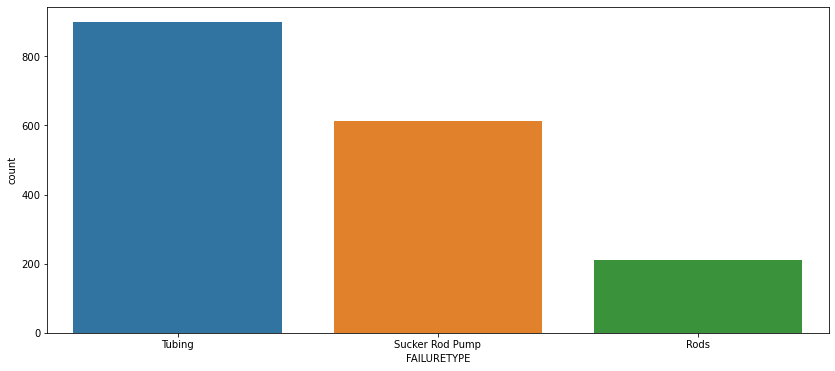

In [859]:
sns.countplot(x='FAILURETYPE', data=df)

In [860]:
# create a column that subtracts lifetime end from lifetime start
df['lifetime_start'] = pd.to_datetime(df['lifetime_start'])
df['lifetime_end'] = pd.to_datetime(df['lifetime_end'])
df['FAILSTART'] = pd.to_datetime(df['FAILSTART'])

In [1]:
app.run_server(mode="jupyterlab")

NameError: name 'app' is not defined

In [861]:
# Convert dates to ordinal values
df['lifetime_start'] = pd.to_datetime(df['lifetime_start'])
df['lifetime_start']= df['lifetime_start'].map(dt.datetime.toordinal)

df['lifetime_end'] = pd.to_datetime(df['lifetime_end'])
df['lifetime_end']= df['lifetime_end'].map(dt.datetime.toordinal)

df['FAILSTART'] = pd.to_datetime(df['FAILSTART'])
df['FAILSTART']= df['FAILSTART'].map(dt.datetime.toordinal)

In [862]:
lifetime = df['lifetime_end'] - df['lifetime_start']
lifetime

0       1708
1        474
2        341
3        429
4        671
        ... 
2591     706
2592     428
2593      43
2594      32
2595     204
Length: 2596, dtype: int64

In [869]:
failure_start_to_complete_failure = df['lifetime_end'] - df['FAILSTART']
failure_start_to_complete_failure

0        24
1        46
2        19
3        56
6        26
       ... 
2587     30
2588    521
2593     31
2594     17
2595     15
Length: 1604, dtype: int64

In [864]:
df['failure_start_to_complete_failure'] = failure_start_to_complete_failure

In [865]:
# add new columns to the data set
df['lifetime'] = lifetime

In [866]:
# get rid of missing rows
df = df.dropna(axis=0)

In [867]:
# check missing values again
df.isnull().sum()

lifetime_start                       0
lifetime_end                         0
FAILSTART                            0
FAILURETYPE                          0
H2S_CONCENTRATION                    0
PrimarySetpoint                      0
SecondarySetpoint                    0
StrokeLength                         0
bha_configuration                    0
chemgroup1_any                       0
chemgroup1_all                       0
chemgroup2_any                       0
chemgroup2_all                       0
chemgroup3_any                       0
chemgroup3_all                       0
max_unguided_dls                     0
dls_high_in_hole                     0
gas_anchor_length                    0
MAX_INCLINATION                      0
wellbore_category                    0
manual_scale                         0
packer_vs_tac                        0
AVG_PRESSURE_TUBING                  0
AVG_PRESSURE_CASING                  0
AVG_DIFFERENTIAL_PRESSURE            0
AVG_OIL_VOLUME           

In [868]:
# Print data
df

,lifetime_start,lifetime_end,FAILSTART,FAILURETYPE,H2S_CONCENTRATION,PrimarySetpoint,SecondarySetpoint,StrokeLength,bha_configuration,chemgroup1_any,...,rod_apigrade,ROUTE,DESANDDEGAS_TYP,CHROME_LENGTH,ENDURALLOY_LENGTH,POLY_LENGTH,NIPPLE_SET_DEPTH,pump_bore,failure_start_to_complete_failure,lifetime
0,735355,737063,737039,Tubing,0.0,75.0,60.0,144.000000,TAC_ABOVE_NIP,1,...,D,900,UNKNOWN,0.0,0.00,0.0,10024.8,1.5,24,1708
1,736722,737196,737150,Tubing,0.0,80.0,62.0,168.000000,TAC_BELOW_NIP,1,...,SpecialService,882,Miller LLC,0.0,0.00,0.0,10235.6,1.5,46,474
2,734394,734735,734716,Sucker Rod Pump,0.0,75.0,60.0,144.000000,PACKER_DONNAN,0,...,D,880,Miller LLC,0.0,0.00,0.0,10401.9,1.5,19,341
3,735975,736404,736348,Sucker Rod Pump,0.0,75.0,60.0,144.199997,TAC_ABOVE_NIP,1,...,D,875,Miller LLC,0.0,0.00,0.0,9557.7,1.75,56,429
6,735829,736046,736020,Tubing,0.0,75.0,60.0,168.000000,TAC_ABOVE_NIP,0,...,SpecialService,883,UNKNOWN,0.0,0.00,0.0,10158.4,1.75,26,217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2587,735638,735985,735955,Tubing,0.0,76.0,60.0,144.000000,PACKER_DONNAN,0,...,SpecialService,875,Miller LLC,0.0,0.00,0.0,10153.1,1.75,30,347
2588,735764,736613,736092,Rods,0.0,75.0,65.0,144.199997,TAC_ABOVE_NIP,1,...,D,885,Miller LLC,0.0,0.00,0.0,9899.3,1.5,521,849
2593,737019,737062,737031,Rods,0.0,75.0,60.0,168.039993,TAC_ABOVE_NIP,0,...,SpecialService,900,West-Washington,0.0,65.35,0.0,9014.5,1.75,31,43
2594,735005,735037,735020,Sucker Rod Pump,0.0,75.0,60.0,144.000000,TAC_ABOVE_NIP,0,...,D,875,UNKNOWN,0.0,0.00,0.0,9532.2,1.5,17,32


In [870]:
# Count the number of rows after removing rows with missing values
df.count()

lifetime_start                       1604
lifetime_end                         1604
FAILSTART                            1604
FAILURETYPE                          1604
H2S_CONCENTRATION                    1604
PrimarySetpoint                      1604
SecondarySetpoint                    1604
StrokeLength                         1604
bha_configuration                    1604
chemgroup1_any                       1604
chemgroup1_all                       1604
chemgroup2_any                       1604
chemgroup2_all                       1604
chemgroup3_any                       1604
chemgroup3_all                       1604
max_unguided_dls                     1604
dls_high_in_hole                     1604
gas_anchor_length                    1604
MAX_INCLINATION                      1604
wellbore_category                    1604
manual_scale                         1604
packer_vs_tac                        1604
AVG_PRESSURE_TUBING                  1604
AVG_PRESSURE_CASING               

In [871]:
# Change data types: dates --> datetime .... objects ---> category
df['FAILURETYPE'] = df['FAILURETYPE'].astype('category')
df['bha_configuration'] = df['bha_configuration'].astype('category')
df['wellbore_category'] = df['wellbore_category'].astype('category')
df['manual_scale'] = df['manual_scale'].astype('category')
df['packer_vs_tac'] = df['packer_vs_tac'].astype('category')
df['rod_sinker_type'] = df['rod_sinker_type'].astype('category')
df['rod_make'] = df['rod_make'].astype('category')
df['rod_apigrade'] = df['rod_apigrade'].astype('category')
df['DESANDDEGAS_TYP'] = df['DESANDDEGAS_TYP'].astype('category')
df['pump_bore'] = df['pump_bore'].astype('category')

In [872]:
# all data types are either floats, integers, datetimes, categoricals, timedeltas, or booleans
df.dtypes

lifetime_start                          int64
lifetime_end                            int64
FAILSTART                               int64
FAILURETYPE                          category
H2S_CONCENTRATION                     float64
PrimarySetpoint                       float64
SecondarySetpoint                     float64
StrokeLength                          float64
bha_configuration                    category
chemgroup1_any                          int64
chemgroup1_all                          int64
chemgroup2_any                          int64
chemgroup2_all                          int64
chemgroup3_any                          int64
chemgroup3_all                          int64
max_unguided_dls                      float64
dls_high_in_hole                      float64
gas_anchor_length                     float64
MAX_INCLINATION                       float64
wellbore_category                    category
manual_scale                         category
packer_vs_tac                     

In [873]:
# types of failures
df['FAILURETYPE']

0                Tubing
1                Tubing
2       Sucker Rod Pump
3       Sucker Rod Pump
6                Tubing
             ...       
2587             Tubing
2588               Rods
2593               Rods
2594    Sucker Rod Pump
2595             Tubing
Name: FAILURETYPE, Length: 1604, dtype: category
Categories (3, object): [Rods, Sucker Rod Pump, Tubing]

In [874]:
# Drop additional columns
df.drop(['FAILURETYPE','bha_configuration', 'rod_has_guides', 'wellbore_category', 'manual_scale', 'packer_vs_tac', 'rod_make', 'rod_sinker_type', 'rod_apigrade', 'DESANDDEGAS_TYP', 'pump_bore', 'chemgroup1_any', 'chemgroup1_all', 'chemgroup2_any', 'chemgroup2_all', 'chemgroup3_any', 'chemgroup3_all'],  axis=1, inplace=True)

In [875]:
df.columns

Index(['lifetime_start', 'lifetime_end', 'FAILSTART', 'H2S_CONCENTRATION',
       'PrimarySetpoint', 'SecondarySetpoint', 'StrokeLength',
       'max_unguided_dls', 'dls_high_in_hole', 'gas_anchor_length',
       'MAX_INCLINATION', 'AVG_PRESSURE_TUBING', 'AVG_PRESSURE_CASING',
       'AVG_DIFFERENTIAL_PRESSURE', 'AVG_OIL_VOLUME', 'AVG_WATER_VOLUME',
       'AVG_LIQUID_VOLUME', 'ROUTE', 'CHROME_LENGTH', 'ENDURALLOY_LENGTH',
       'POLY_LENGTH', 'NIPPLE_SET_DEPTH', 'failure_start_to_complete_failure',
       'lifetime'],
      dtype='object')

In [876]:
df.dtypes

lifetime_start                         int64
lifetime_end                           int64
FAILSTART                              int64
H2S_CONCENTRATION                    float64
PrimarySetpoint                      float64
SecondarySetpoint                    float64
StrokeLength                         float64
max_unguided_dls                     float64
dls_high_in_hole                     float64
gas_anchor_length                    float64
MAX_INCLINATION                      float64
AVG_PRESSURE_TUBING                  float64
AVG_PRESSURE_CASING                  float64
AVG_DIFFERENTIAL_PRESSURE            float64
AVG_OIL_VOLUME                       float64
AVG_WATER_VOLUME                     float64
AVG_LIQUID_VOLUME                    float64
ROUTE                                  int64
CHROME_LENGTH                        float64
ENDURALLOY_LENGTH                    float64
POLY_LENGTH                          float64
NIPPLE_SET_DEPTH                     float64
failure_st

# ML Algorithms

# DBSCAN

In [977]:
# Import packages for DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from collections import Counter


# get rid of missing rows
df = df.dropna(axis=1)

# array
df_dbscan = df.values.astype('int')

# Normalize data
scaler = StandardScaler().fit(df)
df_dbscan = scaler.transform(df)

# Normalized Numpy array
df_dbscan

array([[-0.30910155,  0.81510403,  0.85962685, ...,  0.25605233,
        -0.26364035,  3.0662344 ],
       [ 0.89851571,  0.93479567,  0.96078409, ...,  0.59036182,
        -0.10911778,  0.05282393],
       [-1.15805559, -1.27994961, -1.25738448, ...,  0.85409839,
        -0.29875912, -0.27196018],
       ...,
       [ 1.16088756,  0.81420409,  0.85233624, ..., -1.34619094,
        -0.21447408, -0.99967195],
       [-0.61829397, -1.00816859, -0.98034124, ..., -0.52516615,
        -0.31280663, -1.02653379],
       [-0.5714734 , -0.80568274, -0.77347014, ...,  0.47839669,
        -0.32685413, -0.60651224]])

In [1020]:
# construct DBSCAN model
'''
min_samples: minimum # of points in a neighborhood
eps: radius of neighborhood
'''

model = DBSCAN(eps = 5, min_samples = 12, metric = 'minkowski', leaf_size = 90, p =2).\
    fit(df_dbscan)
model

DBSCAN(eps=5, leaf_size=90, metric='minkowski', min_samples=12, p=2)

In [1021]:
# seperate outliers from clustered data
outliers_df = df[model.labels_ == -1]
clusters_df = df[model.labels_ != -1]

In [1022]:
model.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1023]:
colors = model.labels_
colors_clusters = colors[colors != -1]
colors_outliers = 'red'

# get info about the clusters
clusters = Counter(model.labels_)
print(clusters)
print(df[model.labels_ == -1].head())
print('number of clusters = {}'.format(len(clusters)-1))

Counter({0: 1532, -1: 72})
     lifetime_start  lifetime_end  FAILSTART  H2S_CONCENTRATION  \
7            735394        735582     734928                0.0   
35           736422        737399     736356                0.0   
89           736492        736788     736757                0.0   
204          737126        737448     737377                0.0   
289          736245        737425     736217                0.0   

     PrimarySetpoint  SecondarySetpoint  StrokeLength  max_unguided_dls  \
7               75.0               60.0    144.000000         92.340000   
35              85.0               60.0    169.429993          4.821477   
89              75.0               60.0    144.039993          2.333374   
204             75.0               60.0    144.039993          1.580000   
289             75.0               60.0    144.000000          3.618683   

     dls_high_in_hole  gas_anchor_length  ...  AVG_OIL_VOLUME  \
7           92.340000              37.21  ...       22

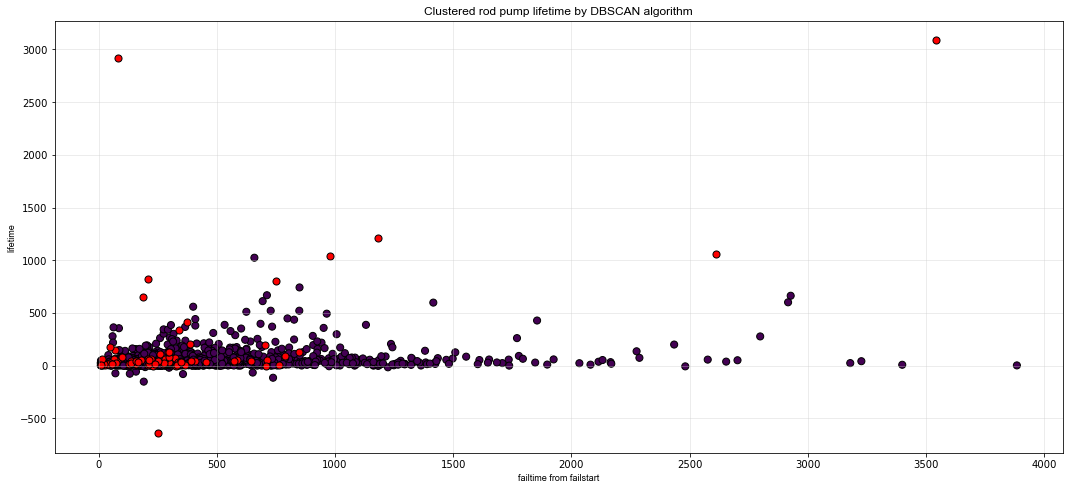

In [1024]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])
ax.scatter(clusters_df['lifetime'], clusters_df['failure_start_to_complete_failure'],
          c = colors_clusters, edgecolors = 'black', s =50)

ax.scatter(outliers_df['lifetime'], outliers_df['failure_start_to_complete_failure'],
          c = colors_outliers, edgecolors = 'black', s =50)

ax.set_xlabel('failtime from failstart', family = 'Arial', fontsize = 9)
ax.set_ylabel('lifetime', family = 'Arial', fontsize = 9)

plt.title('Clustered rod pump lifetime by DBSCAN algorithm', family = 'Arial', fontsize = 12)

plt.grid(which = 'major', color = '#cccccc', alpha = 0.45)

plt.show()